In [1]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil


2024-04-09 21:13:38.554977: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-09 21:13:38.578709: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 21:13:38.932402: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataframe = pd.read_csv('../data/labels-map-proj-v3.txt', delimiter=' ', header=None)
dataframe.columns = ['file_names','labels']
display(dataframe)

,file_names,labels
0,ESP_011623_2100_RED-0069.jpg,0
1,ESP_011623_2100_RED-0069-r90.jpg,0
2,ESP_011623_2100_RED-0069-r180.jpg,0
3,ESP_011623_2100_RED-0069-r270.jpg,0
4,ESP_011623_2100_RED-0069-fh.jpg,0
...,...,...
73026,PSP_010461_1845_RED-0032-r180.jpg,0
73027,PSP_010461_1845_RED-0032-r270.jpg,0
73028,PSP_010461_1845_RED-0032-fh.jpg,0
73029,PSP_010461_1845_RED-0032-fv.jpg,0


In [3]:
file_path = './sorted_images/'
try:
    target_dir = os.path.dirname(file_path)
    if not os.path.exists(target_dir):
            os.makedirs(target_dir)
    for i in dataframe['labels'].unique():
        sub_dir = os.path.dirname(target_dir+ '/' + str(i) + '/')
        if not os.path.exists(sub_dir):
            os.makedirs(sub_dir)
except IOError as e:
        print(f"Error while creating directories: {e}")

In [4]:
image_num = dataframe.shape[0]
for i in range(image_num):
    filname = dataframe['file_names'].iloc[i]
    label = dataframe['labels'].iloc[i]
    target_location = file_path + str(label) + '/' + filname
    if not os.path.exists(target_location):
        shutil.copy2('../data/map-proj-v3/' + filname, target_location)


In [5]:

train_datagen = ImageDataGenerator(validation_split=0.2)

batch_size = 32
img_width, img_height = 256, 256

train_generator = train_datagen.flow_from_directory(
    file_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    file_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Hier geändert zu 'categorical' für Mehrklassenklassifizierung
    subset='validation')

Found 58427 images belonging to 8 classes.
Found 14604 images belonging to 8 classes.


In [6]:
# architecture from https://www.tensorflow.org/tutorials/images/classification 
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_width, img_height, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(train_generator.num_classes, activation='softmax')
])


/home/tobias/Projects/terraform-network-testbed/.venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,413,352 (32.09 MB)

 Trainable params: 8,413,352 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

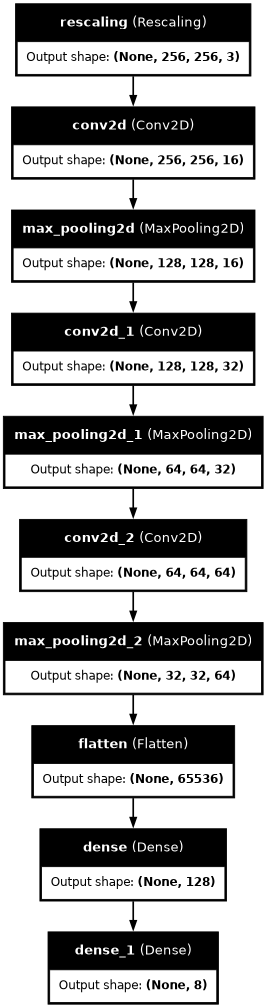

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi=60)

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=800 // batch_size)

Epoch 1/10


/home/tobias/Projects/terraform-network-testbed/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1825/1825 ━━━━━━━━━━━━━━━━━━━━ 260s 142ms/step - accuracy: 0.8383 - loss: 0.6656 - val_accuracy: 0.8200 - val_loss: 0.5898
Epoch 2/10
   1/1825 ━━━━━━━━━━━━━━━━━━━━ 4:08 136ms/step - accuracy: 0.8438 - loss: 0.5342

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-09 21:18:00.503730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1825/1825 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - accuracy: 0.8438 - loss: 0.2673 - val_accuracy: 0.8425 - val_loss: 0.5089
Epoch 3/10
1825/1825 ━━━━━━━━━━━━━━━━━━━━ 259s 142ms/step - accuracy: 0.8778 - loss: 0.3981 - val_accuracy: 0.8537 - val_loss: 0.4638
Epoch 4/10
   1/1825 ━━━━━━━━━━━━━━━━━━━━ 4:43 155ms/step - accuracy: 1.0000 - loss: 0.0750

2024-04-09 21:22:20.195478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1825/1825 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 1.0000 - loss: 0.0375 - val_accuracy: 0.8725 - val_loss: 0.4097
Epoch 5/10
1825/1825 ━━━━━━━━━━━━━━━━━━━━ 259s 142ms/step - accuracy: 0.9064 - loss: 0.2862 - val_accuracy: 0.8475 - val_loss: 0.5474
Epoch 6/10
   1/1825 ━━━━━━━━━━━━━━━━━━━━ 4:06 135ms/step - accuracy: 0.9688 - loss: 0.1669

2024-04-09 21:26:40.192819: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1825/1825 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.9688 - loss: 0.0835 - val_accuracy: 0.8425 - val_loss: 0.5610
Epoch 7/10
1825/1825 ━━━━━━━━━━━━━━━━━━━━ 259s 142ms/step - accuracy: 0.9355 - loss: 0.1867 - val_accuracy: 0.8587 - val_loss: 0.5716
Epoch 8/10
   1/1825 ━━━━━━━━━━━━━━━━━━━━ 4:46 157ms/step - accuracy: 0.9688 - loss: 0.0620

2024-04-09 21:31:00.785809: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1825/1825 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.9688 - loss: 0.0310 - val_accuracy: 0.8625 - val_loss: 0.5723
Epoch 9/10
1825/1825 ━━━━━━━━━━━━━━━━━━━━ 261s 143ms/step - accuracy: 0.9597 - loss: 0.1155 - val_accuracy: 0.8000 - val_loss: 0.7948
Epoch 10/10
   1/1825 ━━━━━━━━━━━━━━━━━━━━ 4:39 153ms/step - accuracy: 0.9375 - loss: 0.2008

2024-04-09 21:35:22.524885: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1825/1825 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - accuracy: 0.9375 - loss: 0.1004 - val_accuracy: 0.8075 - val_loss: 0.7405


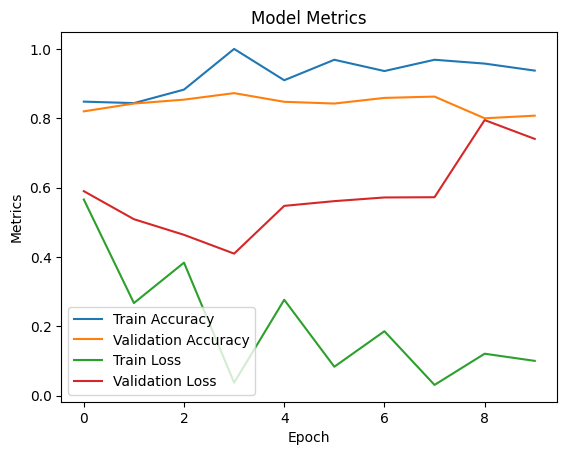

In [9]:
def plot_history(history):
    # Plot training & validation accuracy and loss values
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Metrics')
    plt.legend()
    plt.show()

del model # free model
plot_history(history)

In [10]:
# architecture from https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html with minor adjustment
model2 = Sequential()
model2.add(layers.Rescaling(1./255, input_shape=(img_width, img_height, 3)))
model2.add(layers.Conv2D(32, (3, 3)))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(layers.Conv2D(32, (3, 3)))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(layers.Conv2D(64, (3, 3)))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
model2.add(layers.Dense(64))
model2.add(layers.Activation('relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(train_generator.num_classes,))
model2.add(layers.Activation('sigmoid'))


/home/tobias/Projects/terraform-network-testbed/.venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,715,624 (14.17 MB)

 Trainable params: 3,715,624 (14.17 MB)

 Non-trainable params: 0 (0.00 B)

None

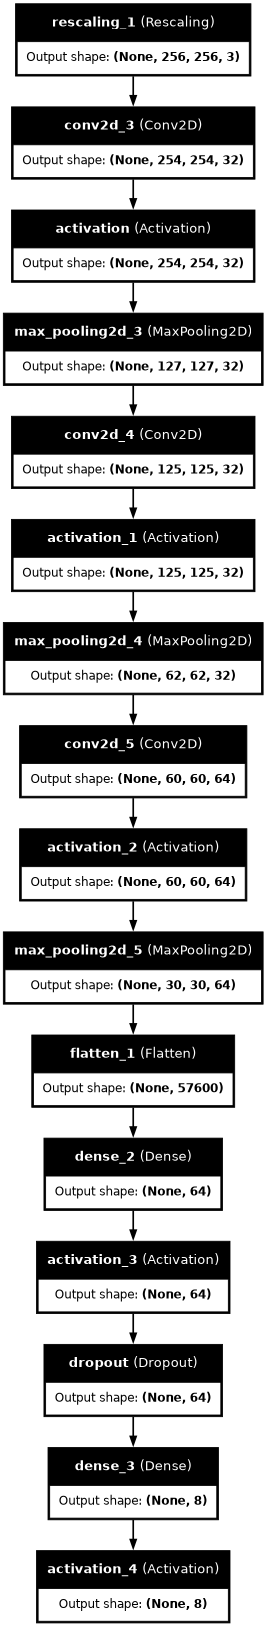

In [11]:
model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
display(model2.summary())
plot_model(model2, to_file='model2_plot.png', show_shapes=True, show_layer_names=True, dpi=60)

In [12]:
history = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=800 // batch_size)

Epoch 1/10
1825/1825 ━━━━━━━━━━━━━━━━━━━━ 382s 209ms/step - accuracy: 0.8262 - loss: 0.1724 - val_accuracy: 0.8400 - val_loss: 0.1339
Epoch 2/10
   1/1825 ━━━━━━━━━━━━━━━━━━━━ 6:10 203ms/step - accuracy: 0.9062 - loss: 0.1035

2024-04-09 21:41:46.079834: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1825/1825 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.9062 - loss: 0.0518 - val_accuracy: 0.8388 - val_loss: 0.1245
Epoch 3/10
1825/1825 ━━━━━━━━━━━━━━━━━━━━ 382s 209ms/step - accuracy: 0.8451 - loss: 0.1250 - val_accuracy: 0.8525 - val_loss: 0.1186
Epoch 4/10
   1/1825 ━━━━━━━━━━━━━━━━━━━━ 6:10 203ms/step - accuracy: 0.8750 - loss: 0.0883

2024-04-09 21:48:09.350632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1825/1825 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - accuracy: 0.8750 - loss: 0.0442 - val_accuracy: 0.8388 - val_loss: 0.1223
Epoch 5/10
1825/1825 ━━━━━━━━━━━━━━━━━━━━ 381s 209ms/step - accuracy: 0.8655 - loss: 0.1070 - val_accuracy: 0.8763 - val_loss: 0.1062
Epoch 6/10
   1/1825 ━━━━━━━━━━━━━━━━━━━━ 6:23 210ms/step - accuracy: 0.9375 - loss: 0.0394

2024-04-09 21:54:32.402423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1825/1825 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.9375 - loss: 0.0197 - val_accuracy: 0.8637 - val_loss: 0.1148
Epoch 7/10
1825/1825 ━━━━━━━━━━━━━━━━━━━━ 380s 208ms/step - accuracy: 0.8770 - loss: 0.0950 - val_accuracy: 0.8662 - val_loss: 0.1090
Epoch 8/10
   1/1825 ━━━━━━━━━━━━━━━━━━━━ 6:17 207ms/step - accuracy: 0.9062 - loss: 0.0894

2024-04-09 22:00:54.580832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1825/1825 ━━━━━━━━━━━━━━━━━━━━ 2s 804us/step - accuracy: 0.9062 - loss: 0.0447 - val_accuracy: 0.8750 - val_loss: 0.1014
Epoch 9/10
1825/1825 ━━━━━━━━━━━━━━━━━━━━ 380s 208ms/step - accuracy: 0.8872 - loss: 0.0845 - val_accuracy: 0.8975 - val_loss: 0.0946
Epoch 10/10
   1/1825 ━━━━━━━━━━━━━━━━━━━━ 6:17 207ms/step - accuracy: 0.9375 - loss: 0.0401

2024-04-09 22:07:16.227494: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1825/1825 ━━━━━━━━━━━━━━━━━━━━ 2s 821us/step - accuracy: 0.9375 - loss: 0.0201 - val_accuracy: 0.8712 - val_loss: 0.1097


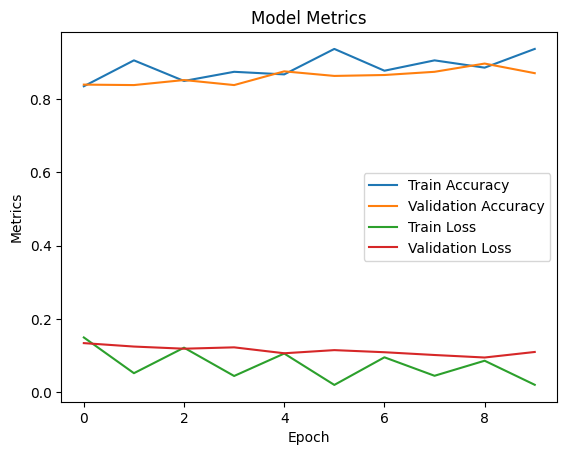

In [13]:
del model2 # free memory
plot_history(history)